# Optimization with Gradient Descent and Newton Method

Lburgueno


In [1]:
# Libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Gradient descent method including Wolfe conditions for step size control

In [2]:
#Find the twoNorm (Euclidean distance between two solution vectors)
def twoNorm(xSol, xReal):
  return np.sqrt((xSol[0]-xReal[0])**2 + (xSol[1]-xReal[1])**2)

In [3]:
def wolfeConditions(stepSize, currentSolution, objectiveFunction, direction, jacobian, gradient):
  c1 = 1e-4
  c2 = 0.9
  functionCurrent = objectiveFunction(currentSolution) #Evaluate the function
  fun = 1 #Number of function evaluations
  jac = 0 # Number of jacobian evaluations
  flag = False # Set flag for wolfe conditions
  while not flag:
    if objectiveFunction(currentSolution+stepSize*direction) > functionCurrent + c1*np.dot(stepSize,(np.matmul(gradient, direction))): #Sufficient decrease condition
      stepSize = stepSize / 2
      fun += 1
    elif np.dot(jacobian(currentSolution+stepSize*direction), direction) < np.dot(c2, np.matmul(gradient, direction)): #Curvature conditon
      stepSize = stepSize * 2
      jac += 1
    else:
      flag = True
  return stepSize, fun, jac

In [4]:
def gradientDescent(objectiveFunction, jacobian, currentSolution, stepSize=0.1, maxIter = 1000, tolerance=1e-6):
  path = [currentSolution]
  evaluations = {"Function": 0, "Jacobian": 0}

  for i in range(maxIter):
    gradient = jacobian(currentSolution) #Get the evaluation of the first derivative with the current solution
    evaluations["Jacobian"] += 1
    direction = -gradient
    stepSize, fun, jac = wolfeConditions(stepSize, currentSolution, objectiveFunction, direction, jacobian, gradient) #Wolfe conditions to check step size
    lastSolution = currentSolution
    currentSolution = currentSolution + stepSize*direction #Update solution
    path.append(currentSolution)
    evaluations["Function"] += fun
    evaluations["Jacobian"] += jac
    if twoNorm(currentSolution, lastSolution)<tolerance:
      break

  evaluations["Iterations"] = i+1

  return currentSolution, path, evaluations

## Newton method

In [5]:
def newtonMethod(objectiveFunction, jacobian, hessian, currentSolution, maxIter = 1000, tolerance=1e-6):
  path = [currentSolution]
  evaluations = {"Function": 0, "Jacobian": 0, "Hessian": 0}

  for i in range(maxIter):
    currentEvaluation = objectiveFunction(currentSolution)
    evaluations["Function"] += 1
    gradient = jacobian(currentSolution) #Get the evaluation of the first derivative with the current solution
    evaluations["Jacobian"] += 1
    hessianMatrix = hessian(currentSolution) #Get the evaluation of the second derivative with the current solution
    evaluations["Hessian"] += 1
    lastSolution = currentSolution
    direction = -np.matmul((np.linalg.inv(hessianMatrix)), gradient)
    currentSolution = currentSolution + direction #We don't need to select step size because we are also using the second derivative
    path.append(currentSolution)
    if twoNorm(currentSolution, lastSolution)<tolerance:
      break

  evaluations["Iterations"] = i

  return currentSolution, path, evaluations

## Test both methods with three problems (do it for minimization)

In [6]:
# Multiplied function A by -1 to make it a minimization problem
def functionA(x):
  return (2*(x[0]**2)) -(3*x[0]*x[1]) + (1.5*(x[1]**2)) + 1.3

def jacobianA(x):
  dx1 = 4*x[0] - 3*x[1]  # Partial derivative with respect to x1
  dx2 = -3*x[0] + 3*x[1]  # Partial derivative with respect to x2
  return np.array([dx1, dx2]) # Return as a vector

def hessianA(x):
  dx1x1 = 4 # Partial derivative of dx1 with respect to x1
  dx1x2 = -3 # Partial derivative of dx1 with respect to x2
  dx2x1 = -3 # Partial derivative of dx2 with respect to x1
  dx2x2 = 3 # Partial derivative of dx2 with respect to x2
  return np.array([[dx1x1, dx1x2], [dx2x1, dx2x2]])

def functionB(x):
  return (4-(2.1*(x[0]**2)) + (x[0]**4)/3)*(x[0]**2) + x[0]*x[1] + (-4+4*x[1]**2)*(x[1]**2)

def jacobianB(x):
  dx1 = 2*x[0]**5 - 8.4*x[0]**3 + 8*x[0] + x[1] # Partial derivative with respect to x1
  dx2 = 16*x[1]**3 - 8*x[1] + x[0] # Partial derivative with respect to x2
  return np.array([dx1, dx2]) # Return as a vector

def hessianB(x):
  dx1x1 = 10*x[0]**4 - 25.2*x[0]**2 + 8 # Partial derivative of dx1 with respect to x1
  dx1x2 = 1  # Partial derivative of dx1 with respect to x2
  dx2x1 = 1 # Partial derivative of dx2 with respect to x1
  dx2x2 = 48*x[1]**2 - 8 # Partial derivative of dx2 with respect to x2
  return np.array([[dx1x1, dx1x2], [dx2x1, dx2x2]])

def functionC(x):
  return 20 + (x[0]**2 - (10*np.cos(2*np.pi*x[0]))) + (x[1]**2 - (10*np.cos(2*np.pi*x[1])))  #since A=10 and n=2 we can define it like this

def jacobianC(x):
    dx1 =  2*x[0] + 20*np.pi*np.sin(2*np.pi*x[0])
    dx2 = 2*x[1] + 20*np.pi*np.sin(2*np.pi*x[1])
    return np.array([dx1, dx2])

def hessianC(x):
    d2x1_dx1 = 2 + 40*np.pi**2*np.cos(2*np.pi*x[0])
    d2x1_dx2 = 0
    d2x2_dx1 = 0
    d2x2_dx2 = 2 + 40*np.pi**2*np.cos(2*np.pi*x[1])

    return np.array([[d2x1_dx1, d2x1_dx2], [d2x2_dx1, d2x2_dx2]])



In [7]:
# First let's get the minimum using the minimize function from scipy.optimize
minA = minimize(functionA, [-4,4])
minB = minimize(functionB, [0.5,1])
minC = minimize(functionC, [-2,2])

print(f"Function A has a minimum value of {minA['fun']} when x1={minA['x'][0]} and x2={minA['x'][1]} according to scipy, but we obtained the actual minimum with Newton method of 1.3 when x1=0 and x2=0")
print(f"Function B has a minimum value of {minB['fun']} when x1={minB['x'][0]} and x2={minB['x'][1]}")
print(f"Function C has a minimum value of {minC['fun']} when x1={minC['x'][0]} and x2={minC['x'][1]} when evaluated with scipy")
print(f"However, the Rastringin function has the global minima at {functionC(np.array([0,0]))} when x1=0 and x2=0") # https://en.wikipedia.org/wiki/Rastrigin_function

Function A has a minimum value of 1.3000000000001024 when x1=1.0230979789749295e-07 and x2=-1.5210565661172293e-07 according to scipy, but we obtained the actual minimum with Newton method of 1.3 when x1=0 and x2=0
Function B has a minimum value of -1.0316284534898768 when x1=-0.08984201774712433 and x2=0.7126563947865581
Function C has a minimum value of 7.959662381108199 when x1=-1.9899122414159327 and x2=1.9899122259557847 when evaluated with scipy
However, the Rastringin function has the global minima at 0.0 when x1=0 and x2=0


In [8]:
#Therefore
minAReal = np.array([0,0])
minBReal = minB['x']
minCReal = np.array([0,0])

The solution obtained for A with the gradient descent algorithm was x1= 2.188077850701829e-06, x2= 2.984102198934198e-06.
The obtained value was 1.3000000000033443, it took 84 function evaluations and 86 evaluations from the derivative
The solution obtained for A with the Newton method was x1=0.0, x2=0.0.
The obtained value was 1.3, it took 2 function evaluations, 2 evaluations from the derivative, and 2 evaluations from the second derivative


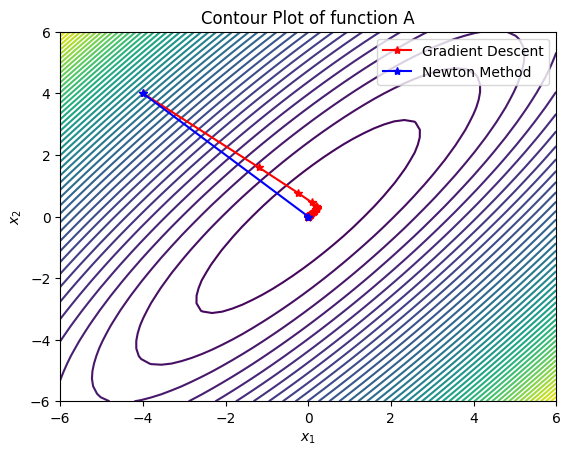

In [9]:
solutionA, pathA, evaluationsA = gradientDescent(functionA, jacobianA, np.array([-4,4]))
print(f"The solution obtained for A with the gradient descent algorithm was x1= {solutionA[0]}, x2= {solutionA[1]}.\nThe obtained value was {functionA(solutionA)}, it took {evaluationsA['Function']} function evaluations and {evaluationsA['Jacobian']} evaluations from the derivative")
solutionANewton, pathANewton, evaluationsANewton = newtonMethod(functionA, jacobianA, hessianA, np.array([-4,4]))
print(f"The solution obtained for A with the Newton method was x1={solutionANewton[0]}, x2={solutionANewton[1]}.\nThe obtained value was {functionA(solutionANewton)}, it took {evaluationsANewton['Function']} function evaluations, {evaluationsANewton['Jacobian']} evaluations from the derivative, and {evaluationsANewton['Hessian']} evaluations from the second derivative")
npPathA = np.array(pathA) #Convert to an np array for the plot
npPathANewton = np.array(pathANewton) #Convert to an np array for the plot
# Generate points for the contour plot in the range indicated
x1 = np.linspace(-6, 6)
x2 = np.linspace(-6, 6)
X1, X2 = np.meshgrid(x1, x2)

# Plotting
plt.figure()
contourA = plt.contour(X1, X2, functionA(np.array([X1, X2])), levels=50)
plt.plot(npPathA[:, 0], npPathA[:, 1], 'r*-', label="Gradient Descent")
plt.plot(npPathANewton[:, 0], npPathANewton[:, 1], 'b*-', label="Newton Method")
plt.title('Contour Plot of function A')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

The solution obtained for B with the gradient descent algorithm was x1=-0.08984205673265093, x2=0.7126560235936793.
The obtained value was -1.0316284534886744, it took 32 function evaluations and 32 evaluations from the derivative
The solution obtained for B with the Newton method was x1=-1.1092053368047865, x2=0.7682680925095399.
The obtained value was 0.5437186009781853, it took 5 function evaluations, 5 evaluations from the derivative, and 5 evaluations from the second derivative


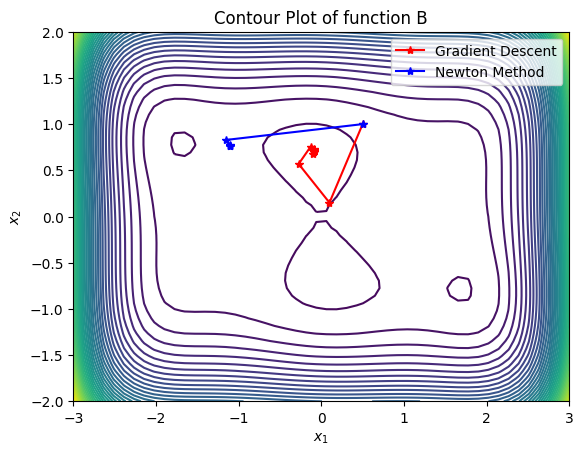

In [10]:
solutionB, pathB, evaluationsB = gradientDescent(functionB, jacobianB, np.array([0.5,1]))
print(f"The solution obtained for B with the gradient descent algorithm was x1={solutionB[0]}, x2={solutionB[1]}.\nThe obtained value was {functionB(solutionB)}, it took {evaluationsB['Function']} function evaluations and {evaluationsB['Jacobian']} evaluations from the derivative")
solutionBNewton, pathBNewton, evaluationsBNewton = newtonMethod(functionB, jacobianB, hessianB, np.array([0.5,1]))
print(f"The solution obtained for B with the Newton method was x1={solutionBNewton[0]}, x2={solutionBNewton[1]}.\nThe obtained value was {functionB(solutionBNewton)}, it took {evaluationsBNewton['Function']} function evaluations, {evaluationsBNewton['Jacobian']} evaluations from the derivative, and {evaluationsBNewton['Hessian']} evaluations from the second derivative")
npPathB = np.array(pathB) #Convert to a vector
npPathBNewton = np.array(pathBNewton)
# Generate points for the contour plot in the range indicated
X1B = np.linspace(-3, 3)
X2B = np.linspace(-2, 2)
X1B, X2B = np.meshgrid(X1B, X2B)
ZB = functionA(np.array([X1B, X2B]))

# Plotting
plt.figure()
contourB = plt.contour(X1B, X2B, functionB(np.array([X1B, X2B])), levels=50)
plt.plot(npPathB[:, 0], npPathB[:, 1], 'r*-', label="Gradient Descent")
plt.plot(npPathBNewton[:, 0], npPathBNewton[:, 1], 'b*-', label="Newton Method")
plt.title('Contour Plot of function B')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

The solution obtained for C with the gradient descent algorithm was x1=-1.989912336215445, x2=1.989912336215445.
The obtained value was 7.959662381112339, it took 13 function evaluations and 8 evaluations from the derivative
The solution obtained for C with the Newton method was x1=-1.9899122337085497, x2=1.9899122337085497.
The obtained value was 7.959662381108174, it took 3 function evaluations, 3 evaluations from the derivative, and 3 evaluations from the second derivative


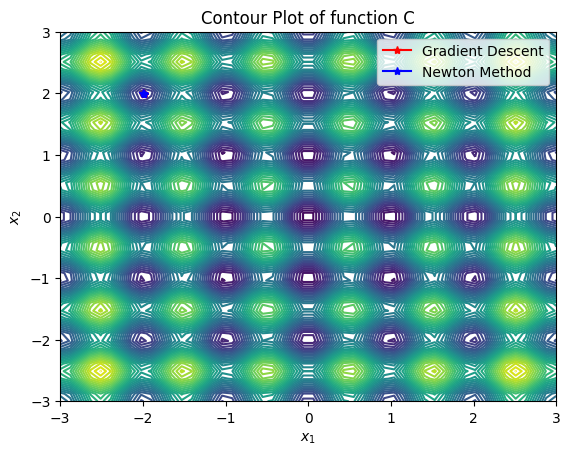

In [11]:
solutionC, pathC, evaluationsC = gradientDescent(functionC, jacobianC, np.array([-2,2]))
print(f"The solution obtained for C with the gradient descent algorithm was x1={solutionC[0]}, x2={solutionC[1]}.\nThe obtained value was {functionC(solutionC)}, it took {evaluationsC['Function']} function evaluations and {evaluationsC['Jacobian']} evaluations from the derivative")
solutionCNewton, pathCNewton, evaluationsCNewton = newtonMethod(functionC, jacobianC, hessianC, np.array([-2,2]))
print(f"The solution obtained for C with the Newton method was x1={solutionCNewton[0]}, x2={solutionCNewton[1]}.\nThe obtained value was {functionC(solutionCNewton)}, it took {evaluationsCNewton['Function']} function evaluations, {evaluationsCNewton['Jacobian']} evaluations from the derivative, and {evaluationsCNewton['Hessian']} evaluations from the second derivative")

npPathC = np.array(pathC) #Convert to a vector
npPathCNewton = np.array(pathCNewton)

# Generate points for the contour plot in the range indicated
X1C = np.linspace(-3, 3)
X2C = np.linspace(-3, 3)
X1C, X2C = np.meshgrid(X1C, X2C)
ZC = functionC(np.array([X1C, X2C]))

# Plotting
plt.figure()
contourC = plt.contour(X1C, X2C, functionC(np.array([X1C, X2C])), levels=50)
plt.plot(npPathC[:, 0], npPathC[:, 1], 'r*-', label="Gradient Descent")
plt.plot(npPathCNewton[:, 0], npPathCNewton[:, 1], 'b*-', label="Newton Method")
plt.title('Contour Plot of function C')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [12]:
# Calculating Two Norm Error
## Function A
errorAGD = twoNorm(solutionA, minAReal)
errorANewton = twoNorm(solutionANewton, minAReal)

## Function B
errorBGD = twoNorm(solutionB, minBReal)
errorBNewton = twoNorm(solutionBNewton, minBReal)

## Function C

errorCGD = twoNorm(solutionC, minCReal)
errorCNewton = twoNorm(solutionCNewton, minCReal)

print(f"For function A the error is:\nGradient Descent: {errorAGD}\nNewton Method: {errorANewton}")

print(f"For function B the error is:\nGradient Descent: {errorBGD}\nNewton Method: {errorBNewton}")

print(f"For function C the error is:\nGradient Descent: {errorCGD}\nNewton Method: {errorCNewton}")

For function A the error is:
Gradient Descent: 3.700344661570845e-06
Newton Method: 0.0
For function B the error is:
Gradient Descent: 3.732345435940984e-07
Newton Method: 1.0208791491473832
For function C the error is:
Gradient Descent: 2.8141610138094126
Newton Method: 2.814160868842771


##Comparison table
### Function A
| Algorithm | Point Found | Evaluation | Total Function Evaluations | Real Minimum | Two Norm Error |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|  Gradient Descent with Wolfe Conditions   |  \[2.188077850701829e-06, 2.984102198934198e-06]   |  1.3000000000033443  | 170 | 1.3 | 3.700344661570845e-06 |
|  Newton Method   |  \[0.0,0.0]   |  1.3   | 6 | 1.3 | 0.0 |

### Function B
| Algorithm | Point Found | Evaluation | Total Function Evaluations | Real Minimum | Two Norm Error |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|  Gradient Descent with Wolfe Conditions   |  \[-0.08984205673265093, 0.7126560235936793]   |  -1.0316284534886744   | 64 | -1.0316284534898768 | 3.732345435940984e-07 |
|  Newton Method   |  \[-1.1092053368047865, x2=0.7682680925095399]   |  0.5437186009781853   | 15 | -1.0316284534898768 | 1.0208791491473832 |

### Function C
| Algorithm | Point Found | Evaluation | Total Function Evaluations | Real Minimum | Two Norm Error |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|  Gradient Descent with Wolfe Conditions   |  \[-1.989912336215445, 1.989912336215445]   |  7.959662381112339   | 21 | 0 | 2.8141610138094126 |
|  Newton Method   |  \[-1.9899122337085497, x2=1.9899122337085497]   |  7.959662381108174   | 9 | 0 | 2.814160868842771 |

## Which method to select to solve each of the problems:

### Function A
Newton Method since it easily got the real solution while needing only 6 function evaluations

### Function B
Gradient Descent with Wolfe Conditions because it obtained the smallest error with 64 function evaluations

### Function C
Gradient Descent and Newton Method both got stuck in local optima so other heuristics would probably be better for this task